## Entrelazamiento 2 qubit el segundo en fase negativa

In [ ]:
# Si no tenemos instalado Qiskit Aer, podemos instalarlo con los siguientes comandos:
!pip install qiskit-aer
!pip install --upgrade qiskit-aer

In [4]:
# Importo las liberías necesarias de Qiskit: QuantumCicuit 
# QuantumCircuit es una clase que permite crear circuitos cuánticos.
# y Aer, que es un simulador de Qiskit.
from qiskit import QuantumCircuit
from qiskit_aer import Aer

In [5]:
circ = QuantumCircuit(2,2) # declaro un circuito cuántico con 2 qubits y 2 bits clásicos
circ.h(0) # aplico la compuerta Hadamard al primer qubit
circ.draw() # dibujo el circuito
# draw() es un método que permite visualizar el circuito cuántico de forma gráfica.

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
c: 2/═════

Hasta ahora no he hecho nada más que declarar el circuito. 
No hemos ejecutado nada. 

In [6]:
# Importo las liberías necesarias de Qiskit: Aer, transpile y plot_histogram
# Transpile es una función que optimiza el circuito para que se ejecute en un dispositivo cuántico específico.
# Plot_histogram es una función que permite visualizar los resultados de la simulación con mejor detalle que draw().
from qiskit import transpile
from qiskit.visualization import plot_histogram

Comienzo a generar cambios en el vector de cada uno de los qubits. 

In [7]:
circ = QuantumCircuit(2,2) # declaro un circuito cuántico con 2 qubits y 2 bits clásicos
circ.h(0) # aplico la compuerta Hadamard al primer qubit
circ.x(1) # aplico la compuerta X al segundo qubit
circ.z(1) # aplico la compuerta Z al segundo qubit
# la puerta Z es una compuerta de fase que cambia el signo del estado |1>, signo se refiere a la fase del estado cuántico, 
# el signo será negativo si estando en superposición, el qubit se encuentra alineado con el eje x negativo.
circ.measure((0,1),(0,1)) # Significa que los qubits 0 y 1 se miden y los resultados se almacenan en los bits clásicos 0 y 1.   
# El método measure() es una operación que mide el estado de los qubits y almacena el resultado en los bits clásicos.

circ.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├─────┤M├───
     ├───┤┌───┐└╥┘┌─┐
q_1: ┤ X ├┤ Z ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Estado y veces que aparece : {'11': 513, '10': 511}


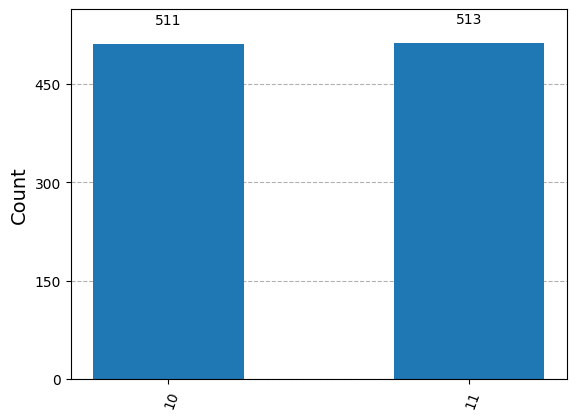

In [12]:
backend= Aer.get_backend("qasm_simulator") # Obtengo el backend del simulador cuántico
# El backend es el dispositivo cuántico o simulador donde se ejecutará el circuito.
job= backend.run(transpile (circ,backend)) # Transpile optimiza el circuito para que se ejecute en el backend especificado.
# job es el objeto que representa la ejecución del circuito en el backend.
result= job.result() # Obtengo el resultado de la ejecución del circuito, las medidas de los estados medidos tras la simulación.
count = result.get_counts(circ)# get_counts() devuelve un diccionario con los resultados de las medidas.
print("Estado y veces que aparece :", count)
plot_histogram(count)
